In [3]:
import csv

input_file = "./data/datainfo_20230925_kaist.csv"
table_file = 'duih_table.csv'

with open(input_file, 'r', newline='') as f_input:
    csv_input = csv.reader(f_input)
    data = list(csv_input)

transposed = zip(*data)

# with open(table_file, 'w', newline='') as f_output:
#     csv_output = csv.writer(f_output)
#     csv_output.writerows(transposed)

print(f"Transposed data has been written to {table_file}.")

Transposed data has been written to duih_table.csv.


In [4]:
import csv
import numpy as np

# Define an empty list to store the data
data = []

# Open and read the CSV file
with open(table_file, 'r', newline='') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        data.append(row)

# Print the data to verify the content
data = np.asarray(data)
print(data)

[['\ufeffDID' 'Age' 'Sex(M=1, F=2)' ... 'SNSB_Visuospatial' 'SNSB_Memory'
  'SNSB_Frontal']
 ['DUIH_0001' '71' '1' ... '' '' '']
 ['DUIH_0002' '90' '1' ... '' '' '']
 ...
 ['DUIH_0165' '72' '2' ... '3.94' '1.11' '18.79']
 ['DUIH_0166' '82' '2' ... '0.31' '0.3' '0.36']
 ['DUIH_0167' '78' '2' ... '<.01' '0.09' '<.01']]


In [7]:
from pathlib import Path
subjects_dir = Path("./data/AWS/")

In [8]:
import pickle
import numpy as np
import nibabel
import matplotlib.pyplot as plt


count=0
for i in range(1, data.shape[0]):
    
    if np.all(data[i,6:] != ''):
        ml_data= {}
        count+=1
        for j in range(6, data.shape[1]):
            if '<' in data[i,j]:
                data[i,j]=0.01
        table_data=data[i,:]
        table_data = np.delete(table_data,[4,5])

        ml_data['table']=table_data
        t1_fname = subjects_dir / "NIFTI" / data[i,0] /  "T1FromFS" / "T1_NU_256by256.nii"
        mask_fname = subjects_dir / "FSres" / data[i,0] / "mri" / "aseg.mgz"
        try:
            t1 = nibabel.load(t1_fname)
            mask = nibabel.load(mask_fname)
            ml_data['mri']= np.array(t1.dataobj)/255.0
            label = np.array(mask.dataobj)
            
            label[label==2]= 1000 # L WM
            label[label==41]=1000 # R WM
            label[label==3]=1001 # L Cortex
            label[label==42]=1001 # R Cortex
            label[label<1000]=0 # Background
            label[label==1000]=1 # WM
            label[label==1001]=2 # Cortex
            
            ml_data['label']= label
            with open(f'./data/ml_process/{data[i,0]}.pickle', 'wb') as f:
                pickle.dump(ml_data, f)
            count+=1
        except:
            print(i)
            pass
    else:
        print(i)
print(count)


1
2
3
4
5
6
7
8
9
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
68
69
70
71
73
74
75
76
77
79
80
81
82
84
85
86
87
88
89
90
91
92
94
96
97
99
100
102
103
104
108
109
110
111
112
113
114
115
116
117
118
120
123
124
125
126
127
128
129
130
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
152
154
155
157
158
159
160
163
164
166
128


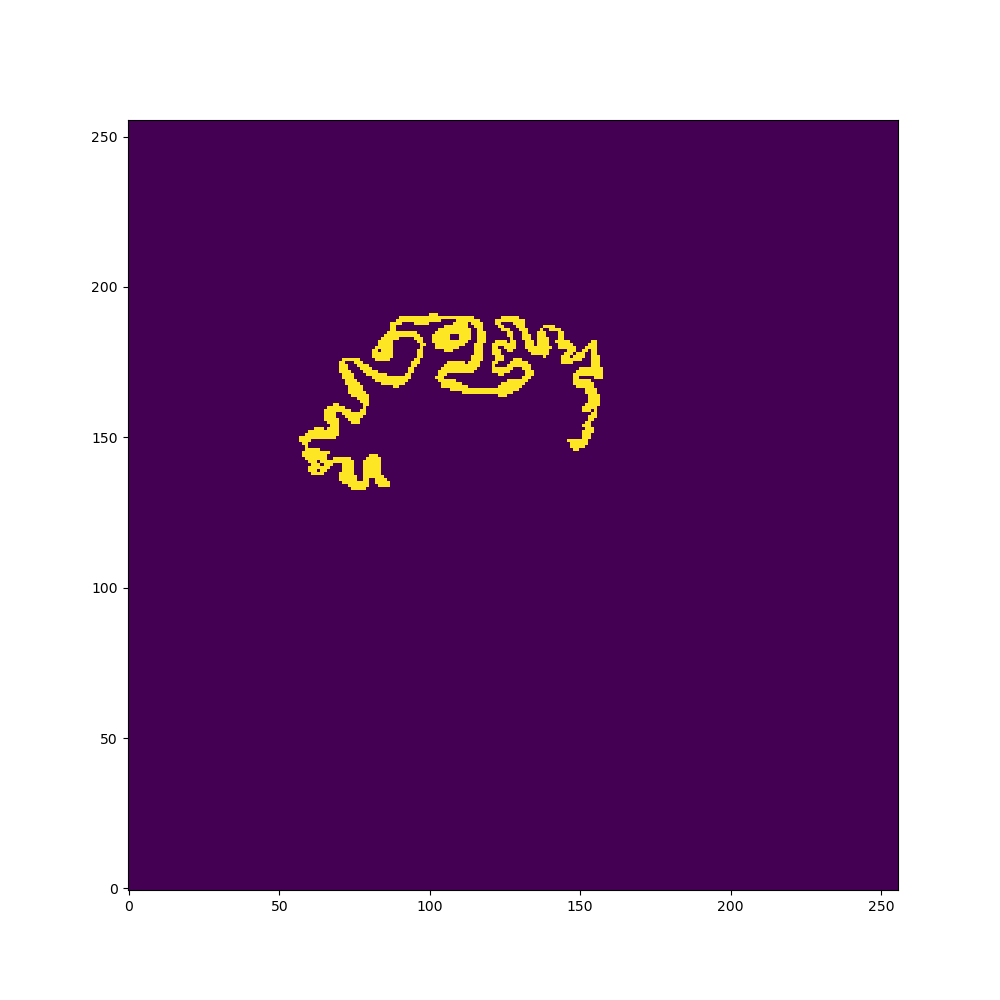

2 [  0 255] (256, 256, 256)


In [57]:
import matplotlib.pyplot as plt
mask_fname = "data/FSres/DUIH_0001/mri/aseg.mgz"
mask = np.array(nibabel.load(mask_fname).dataobj)

mask[mask==3]=255
mask[mask!=255]=0
plt.figure(figsize=(10,10))
plt.imshow((mask[:,:,128]), origin='lower')
plt.show()

print(len(np.unique(mask)),np.unique(mask), mask.shape)

In [49]:
import os
print(len(os.listdir("./data/ml_process/train")))

46
